# Conversión DICOM a PNG

In [57]:
import pandas as pd
import numpy as np
import pydicom
import png
from tqdm.notebook import tqdm_notebook as tqdm

In [43]:
data = pd.read_pickle("Fullmamo.pkl")

In [48]:
paths = data['MainPath'].values

In [54]:
paths

array(['CBIS-DDSM/Mass-Training_P_00001_LEFT_CC/07-20-2016-DDSM-NA-74994/1.000000-full mammogram images-24515/1-1.dcm',
       'CBIS-DDSM/Mass-Training_P_00001_LEFT_MLO/07-20-2016-DDSM-NA-90988/1.000000-full mammogram images-80834/1-1.dcm',
       'CBIS-DDSM/Mass-Training_P_00004_LEFT_CC/07-20-2016-DDSM-NA-95697/1.000000-full mammogram images-46540/1-1.dcm',
       ...,
       'CBIS-DDSM/Calc-Training_P_02572_LEFT_CC/08-07-2016-DDSM-NA-71087/1.000000-full mammogram images-83907/1-1.dcm',
       'CBIS-DDSM/Calc-Training_P_02584_LEFT_CC/08-07-2016-DDSM-NA-52918/1.000000-full mammogram images-98700/1-1.dcm',
       'CBIS-DDSM/Calc-Training_P_02584_LEFT_MLO/08-07-2016-DDSM-NA-90579/1.000000-full mammogram images-39237/1-1.dcm'],
      dtype=object)

In [53]:
paths[0][10:]

'Mass-Training_P_00001_LEFT_CC/07-20-2016-DDSM-NA-74994/1.000000-full mammogram images-24515/1-1.dcm'

In [32]:
import os
os.getcwd()

'/mnt/atrys/Marcelo/MamosNew/CBIS'

In [58]:
count = 0
indice = []
for i in tqdm(paths): 
    ds = pydicom.dcmread(i)

    shape = ds.pixel_array.shape

    # Convert to float to avoid overflow or underflow losses.
    image_2d = ds.pixel_array.astype(float)

    # Rescaling grey scale between 0-255
    image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0

    # Convert to uint
    image_2d_scaled = np.uint8(image_2d_scaled)

    # Write the PNG file
    with open(f"/mnt/atrys/Marcelo/MamosNew/CBIS/Png/Mamo{count}.png", 'wb') as png_file:
        w = png.Writer(shape[1], shape[0], greyscale=True)
        w.write(png_file, image_2d_scaled)
    
    # Append to index
    indice.append(f"Mamo{count}")
    count = count+1

  0%|          | 0/3104 [00:00<?, ?it/s]

In [41]:
image_2d_scaled

array([[255, 255, 255, ..., 151, 149, 147],
       [255, 255, 255, ..., 148, 147, 142],
       [255, 255, 255, ..., 149, 148, 143],
       ...,
       [255, 255, 255, ..., 146, 144, 144],
       [255, 255, 255, ..., 161, 161, 162],
       [255, 255, 255, ..., 172, 176, 176]], dtype=uint8)

In [21]:
dataset = pydicom.dcmread(data.iloc[0]['MainPath'])
img = dataset.pixel_array

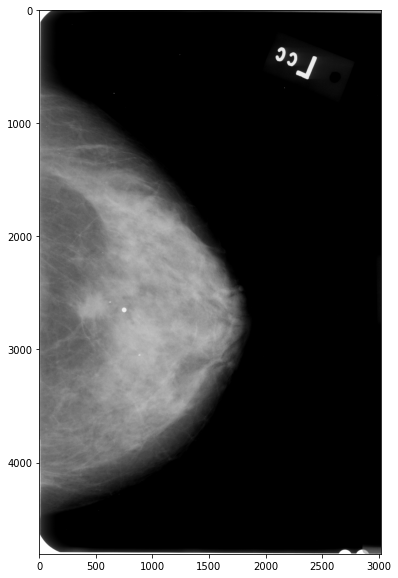

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10 , 10))
plt.imshow(img, cmap = "gray")

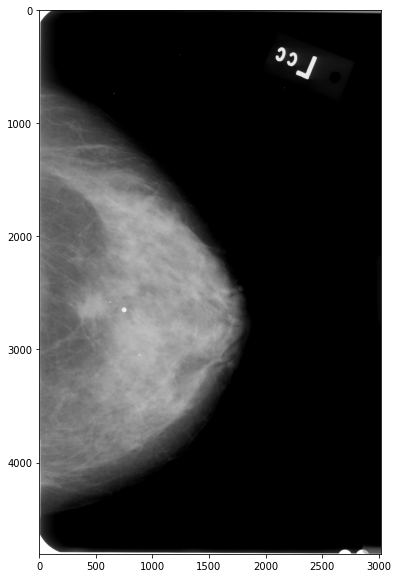

In [26]:
plt.figure(figsize = (10 , 10))
plt.imshow(image_2d_scaled, cmap = "gray")

In [61]:
data['Index'] = indice

In [62]:
data

,Patient_ID,Data Description URI,Study Type,File Location,File Path,Orientation,Exam Type,Patologia,MainPath,y,Index
4120,P_00001,Mass-Training_P_00001_LEFT_CC,full mammogram images,./CBIS-DDSM/Mass-Training_P_00001_LEFT_CC/07-2...,CBIS-DDSM/Mass-Training_P_00001_LEFT_CC/07-20-...,Left,CC,Mass,CBIS-DDSM/Mass-Training_P_00001_LEFT_CC/07-20-...,1,Mamo0
4125,P_00001,Mass-Training_P_00001_LEFT_MLO,full mammogram images,./CBIS-DDSM/Mass-Training_P_00001_LEFT_MLO/07-...,CBIS-DDSM/Mass-Training_P_00001_LEFT_MLO/07-20...,Left,MLO,Mass,CBIS-DDSM/Mass-Training_P_00001_LEFT_MLO/07-20...,0,Mamo1
4126,P_00004,Mass-Training_P_00004_LEFT_CC,full mammogram images,./CBIS-DDSM/Mass-Training_P_00004_LEFT_CC/07-2...,CBIS-DDSM/Mass-Training_P_00004_LEFT_CC/07-20-...,Left,CC,Mass,CBIS-DDSM/Mass-Training_P_00004_LEFT_CC/07-20-...,1,Mamo2
4127,P_00004,Mass-Training_P_00004_RIGHT_MLO,full mammogram images,./CBIS-DDSM/Mass-Training_P_00004_RIGHT_MLO/07...,CBIS-DDSM/Mass-Training_P_00004_RIGHT_MLO/07-2...,Right,MLO,Mass,CBIS-DDSM/Mass-Training_P_00004_RIGHT_MLO/07-2...,0,Mamo3
4128,P_00004,Mass-Training_P_00004_LEFT_MLO,full mammogram images,./CBIS-DDSM/Mass-Training_P_00004_LEFT_MLO/07-...,CBIS-DDSM/Mass-Training_P_00004_LEFT_MLO/07-20...,Left,MLO,Mass,CBIS-DDSM/Mass-Training_P_00004_LEFT_MLO/07-20...,0,Mamo4
...,...,...,...,...,...,...,...,...,...,...,...
3362,P_02566,Calc-Training_P_02566_RIGHT_CC,full mammogram images,./CBIS-DDSM/Calc-Training_P_02566_RIGHT_CC/08-...,CBIS-DDSM/Calc-Training_P_02566_RIGHT_CC/08-07...,Right,CC,Calc,CBIS-DDSM/Calc-Training_P_02566_RIGHT_CC/08-07...,1,Mamo3099
3364,P_02572,Calc-Training_P_02572_LEFT_MLO,full mammogram images,./CBIS-DDSM/Calc-Training_P_02572_LEFT_MLO/08-...,CBIS-DDSM/Calc-Training_P_02572_LEFT_MLO/08-07...,Left,MLO,Calc,CBIS-DDSM/Calc-Training_P_02572_LEFT_MLO/08-07...,0,Mamo3100
3361,P_02572,Calc-Training_P_02572_LEFT_CC,full mammogram images,./CBIS-DDSM/Calc-Training_P_02572_LEFT_CC/08-0...,CBIS-DDSM/Calc-Training_P_02572_LEFT_CC/08-07-...,Left,CC,Calc,CBIS-DDSM/Calc-Training_P_02572_LEFT_CC/08-07-...,1,Mamo3101
3367,P_02584,Calc-Training_P_02584_LEFT_CC,full mammogram images,./CBIS-DDSM/Calc-Training_P_02584_LEFT_CC/08-0...,CBIS-DDSM/Calc-Training_P_02584_LEFT_CC/08-07-...,Left,CC,Calc,CBIS-DDSM/Calc-Training_P_02584_LEFT_CC/08-07-...,1,Mamo3102
